In [ ]:
pip install plantcv

     |████████████████████████████████| 215kB 13.7MB/s 
     |████████████████████████████████| 49.1MB 92kB/s 
     |████████████████████████████████| 665kB 46.3MB/s 
     |████████████████████████████████| 102kB 13.0MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=5843d39dacdb83f7199e589885a71f15474f033f038624c8d868629655b50b05
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: tensorflow-probability 0.11.0 has requirement cloudpickle==1.3, but you'll have cloudpickle 1.6.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Success

In [ ]:
from plantcv import plantcv as pcv
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
img, path, filename = pcv.readimage('shadow.jpeg')

In [ ]:
# Inputs:
#   rgb_img - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

In [ ]:
# Threshold the Saturation image

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard threshold is done.
#                 If the object is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=100, max_value=255, object_type='light')

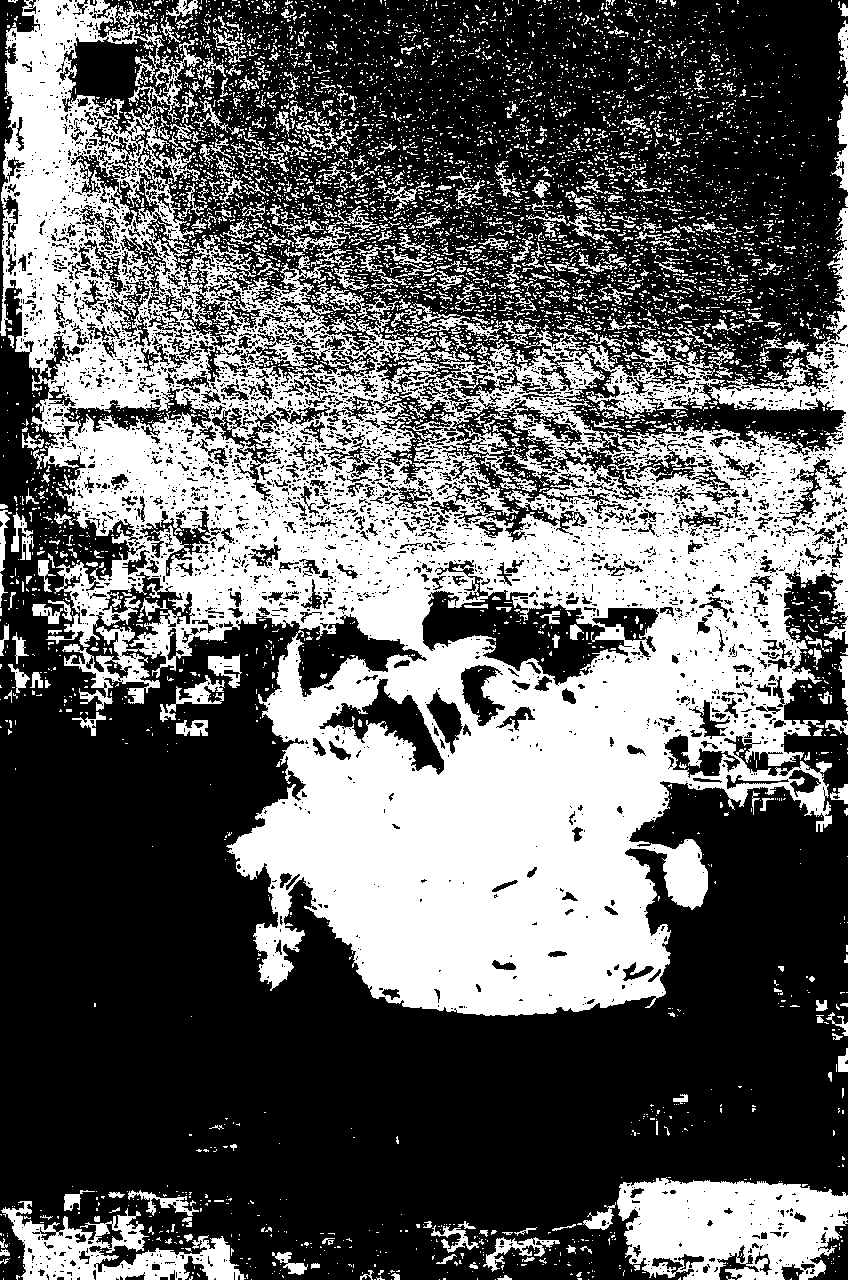

In [ ]:
cv2_imshow(s_thresh)

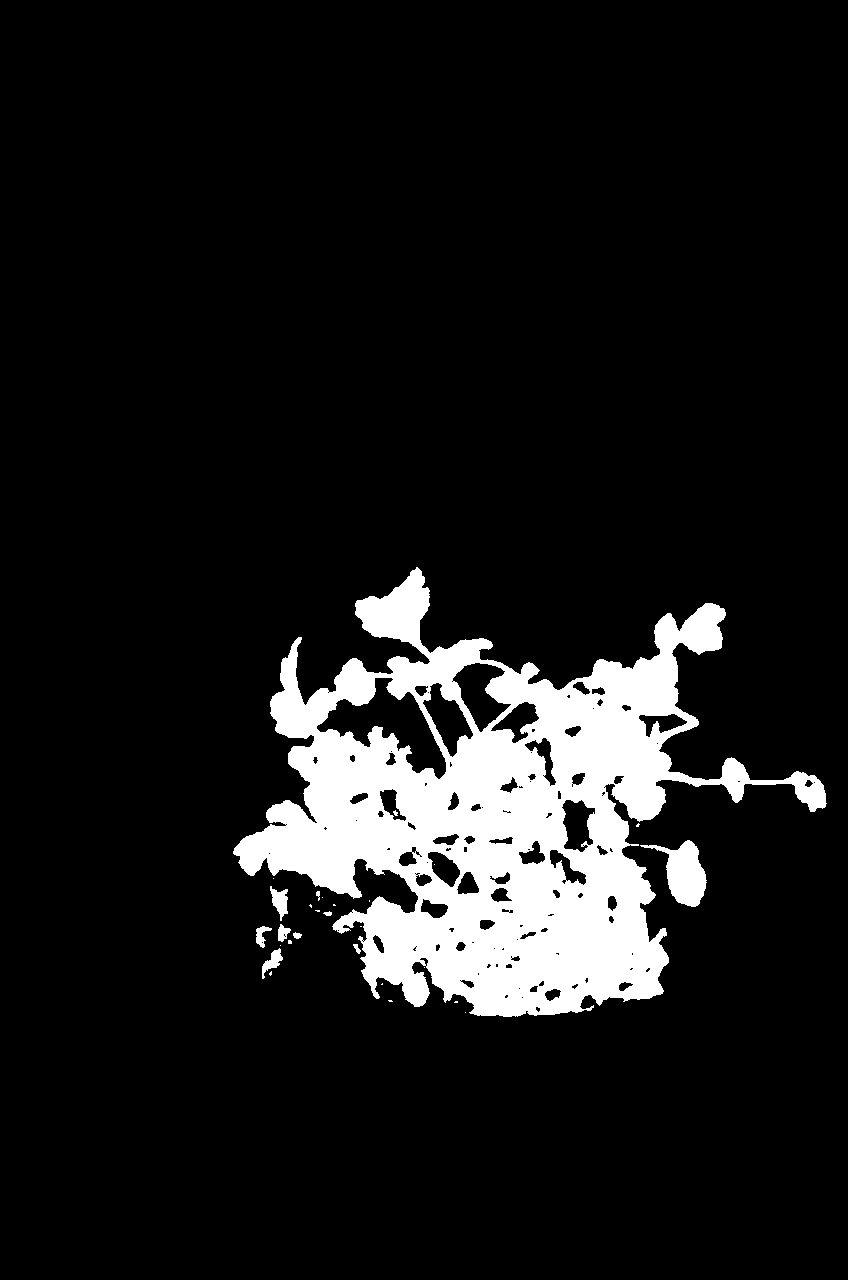

In [ ]:
# Convert RGB to LAB and extract the blue-yellow channel

# Input:
#   rgb_img - RGB image data 
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue-yellow channel image
b_thresh = pcv.threshold.binary(gray_img=b, threshold=150, max_value=255, object_type='light')
cv2_imshow(b_thresh)

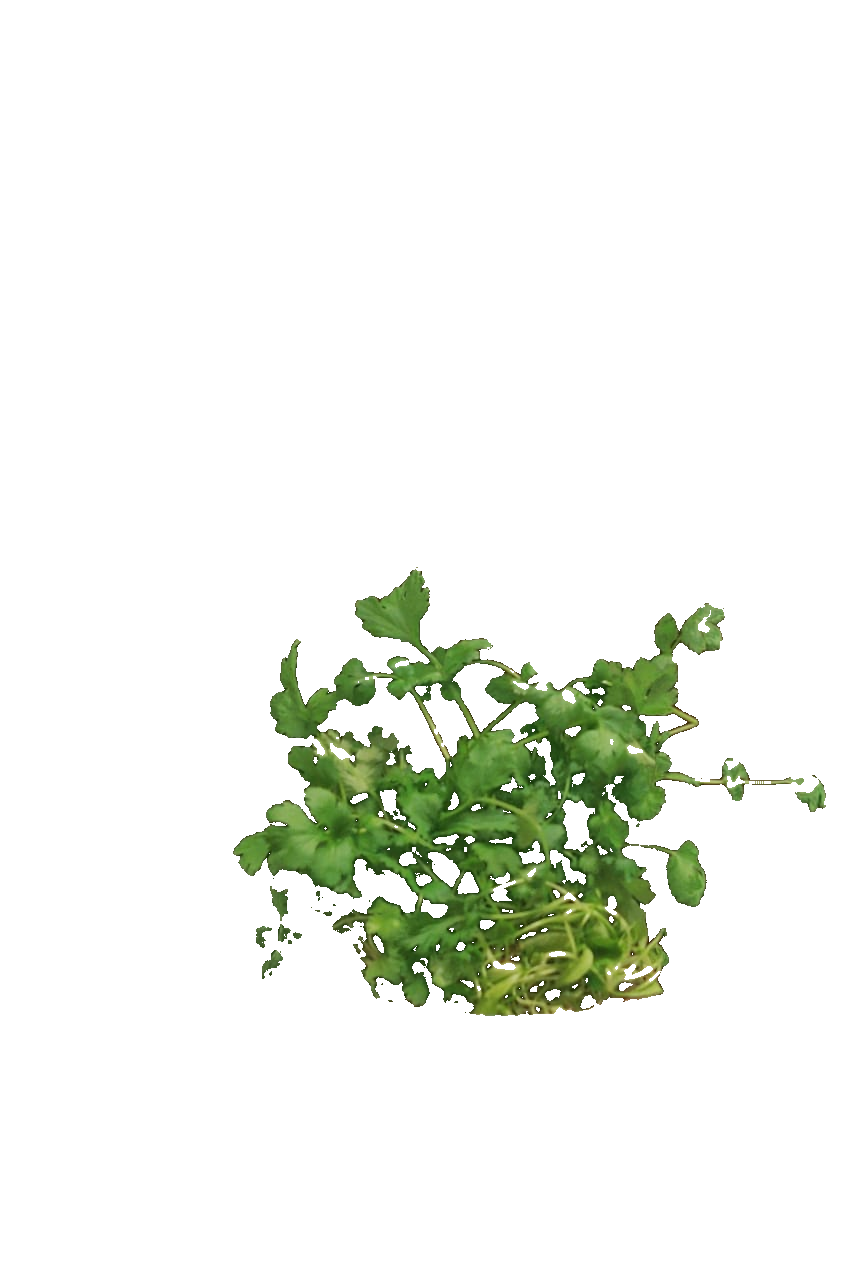

In [ ]:

# Inputs: 
#   gray_img - Grayscale image data 
#   ksize - Kernel size (integer or tuple), (ksize, ksize) box if integer input,
#           (n, m) box if tuple input 
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

# Join the thresholded saturation and blue-yellow images

# Inputs: 
#   bin_img1 - Binary image data to be compared to bin_img2
#   bin_img2 - Binary image data to be compared to bin_img1
bs = pcv.logical_and(bin_img1=s_mblur, bin_img2=b_thresh)


# Apply Mask

# Inputs:
#   img - RGB or grayscale image data 
#   mask - Binary mask image data 
#   mask_color - 'white' or 'black' 
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')
cv2_imshow(masked)

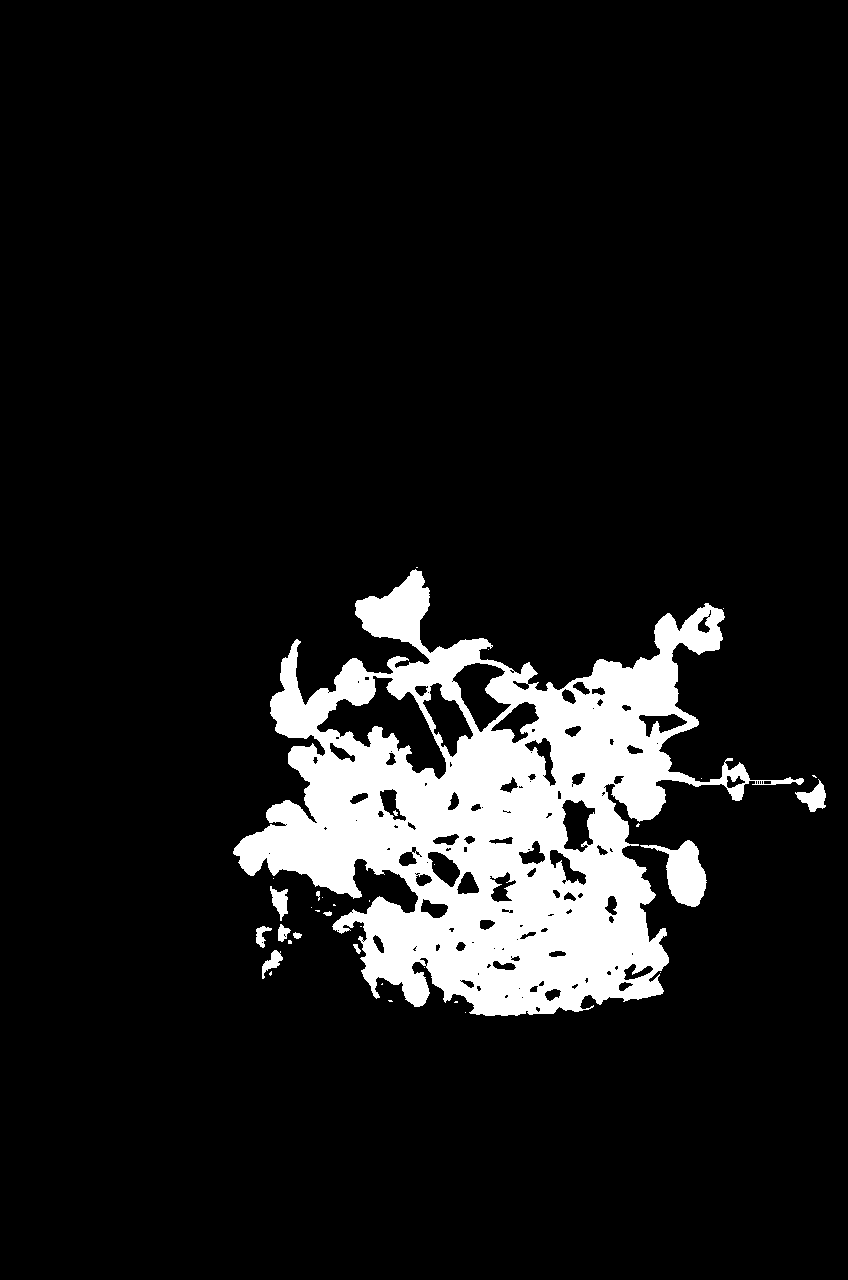

In [ ]:
# Inputs:
#   rgb_img - RGB image data 
#   channel - Split by 'h' (hue), 's' (saturation), or 'v' (value) channel
s = pcv.rgb2gray_hsv(rgb_img=masked, channel='s')


# Threshold the Saturation image

# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard threshold is done.
#                 If the object is darker than the background then inverse thresholding is done. 
s_thresh = pcv.threshold.binary(gray_img=s, threshold=50, max_value=255, object_type='light')
cv2_imshow(s_thresh)

[[[ 465 1012]]]
(803, 781)
(233, 851)


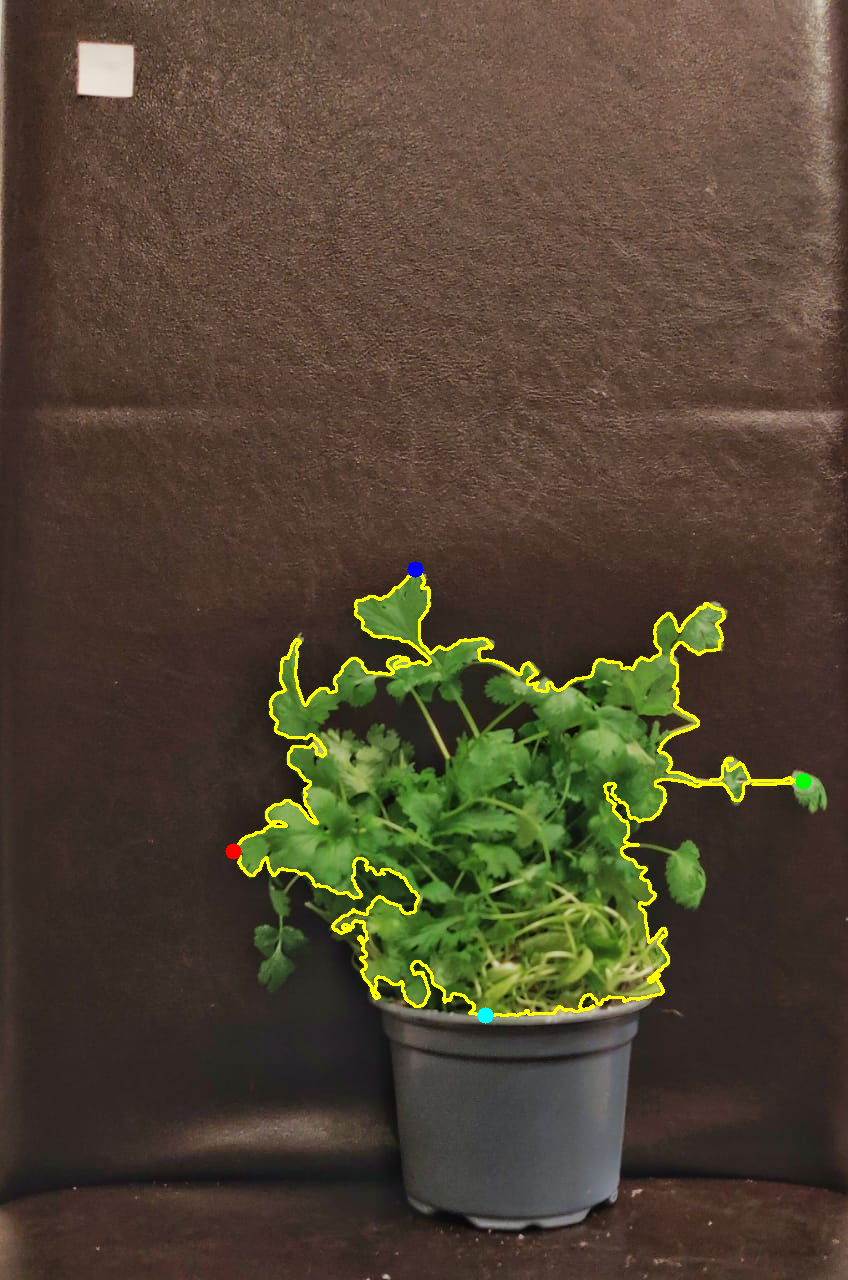

-1

In [ ]:
img, path, filename = pcv.readimage('shadow.jpeg')# import the necessary packages
import imutils
import cv2
cnts = cv2.findContours(s_thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(cnts[0])
d = max(cnts, key=cv2.contourArea)


# determine the most extreme points along the contour
extLeft = tuple(d[d[:, :, 0].argmin()][0])
extRight = tuple(d[d[:, :, 0].argmax()][0])
extTop = tuple(d[d[:, :, 1].argmin()][0])
extBot = tuple(d[d[:, :, 1].argmax()][0])

print(extRight)
print(extLeft)
#wide = euclidean(extRight, extLeft)/pixel_per_cm
#hte = euclidean(extTop, extBot)/pixel_per_cm
#print(wide)
#print(hte)

# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(img, [d], -1, (0, 255, 255), 2)
cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img, extRight, 8, (0, 255, 0), -1)
cv2.circle(img, extTop, 8, (255, 0, 0), -1)
cv2.circle(img, extBot, 8, (255, 255, 0), -1)
# show the output image
cv2_imshow(img)
cv2.waitKey(0)

19.59472565885623
15.253771167829534


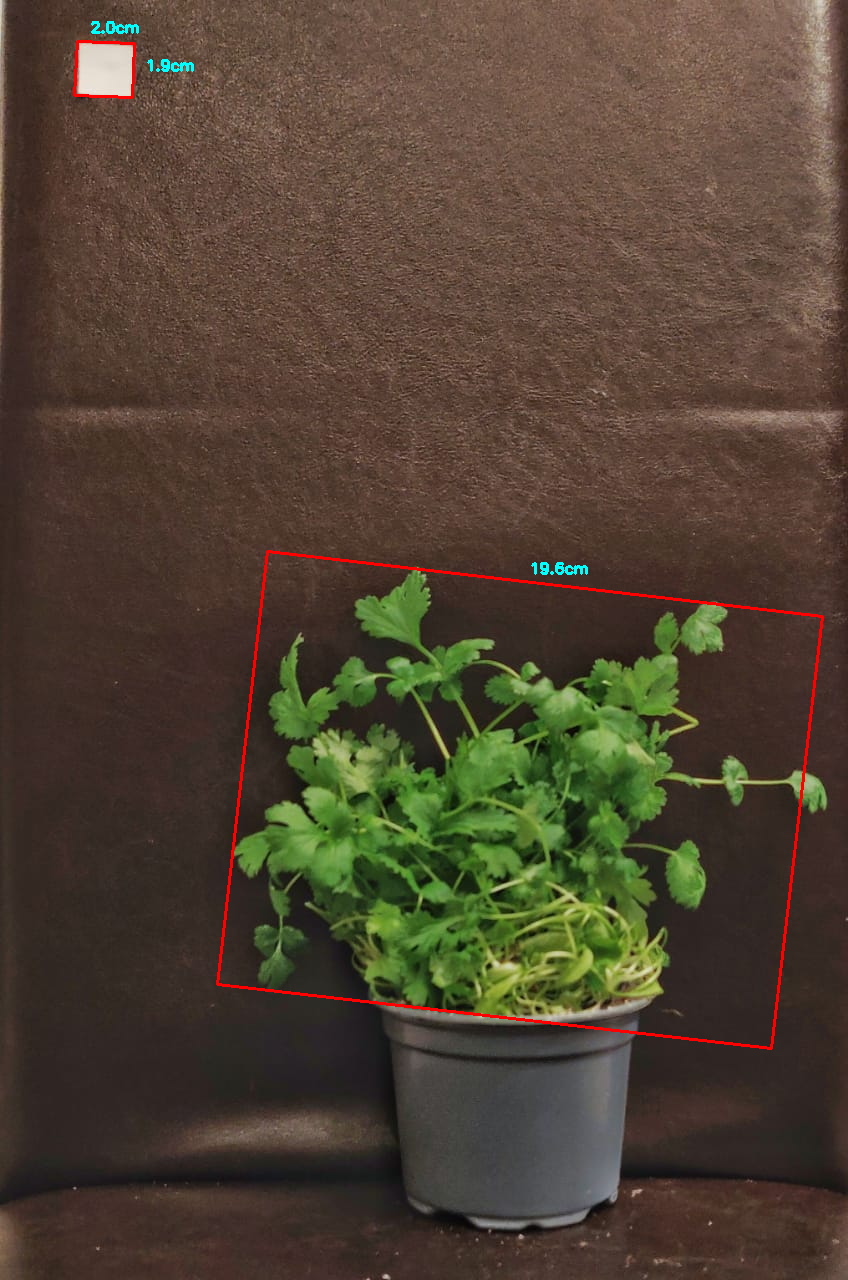

In [ ]:

# Function to show array of images (intermediate results)
def show_images(images):
	for i, img in enumerate(images):
		cv2_imshow(img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

img_path = "shadow.jpeg"

# Read image and preprocess
image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

#show_images([blur, edged])

# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]
#print(cnts[0])

cnts = [cnts[0],d]
#print(cnts[0])
#print(len(cnts))
#print(extBot)
#print(extLeft)
#print(extRight)
#print(extTop)

#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

#show_images([image, edged])
#print(len(cnts))

# Reference object dimensions
# Here for reference I have used a 2cm x 2cm square
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr)
dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm

# Draw remaining contours
for cnt in cnts:
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
	wid = euclidean(tl, tr)/pixel_per_cm
	ht = euclidean(tr, br)/pixel_per_cm
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
print(wid)
print(ht)
show_images([image])

In [ ]:
print("Width of the plant is {:.1f}cm".format(wid))
print("Height of the plant in {:.1f}cm".format(ht))

Width of the plant is 19.6cm
Height of the plant in 15.3cm
